## Feature Selection/ Dimension Reduction Using LassoCV

## Import all the required package

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from itertools import chain, combinations
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV

from sklearn.preprocessing import StandardScaler

  
import warnings
warnings.filterwarnings("ignore")

### Read the Data

In [3]:
df = pd.read_csv("data_after_mice.csv",header=0,encoding='utf-8')

In [4]:
df

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,...,verification_status_Source Verified,verification_status_Verified,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),issue_month,issue_year
0,0,7000.0,7000.0,7000.000000,0,6.62,214.93,0,48000.0,16.00,...,1,0,0,0,1,0,0,0,10,2011
1,1,7200.0,7200.0,7200.000000,0,12.42,240.59,9,35000.0,6.14,...,0,0,0,0,1,0,0,0,10,2011
2,2,22000.0,22000.0,22000.000000,0,14.65,758.88,1,192000.0,1.82,...,0,1,0,0,1,0,0,0,10,2011
3,3,18750.0,18750.0,18750.000000,0,7.90,586.70,3,75000.0,13.94,...,1,0,0,0,1,0,0,0,11,2011
4,4,12500.0,12500.0,12500.000000,0,7.90,391.13,3,32500.0,24.15,...,0,0,0,0,1,0,0,0,10,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5995,30000.0,30000.0,27212.914318,1,19.29,783.02,6,38400.0,1.72,...,0,1,1,0,0,0,0,0,7,2011
5996,5996,2400.0,2400.0,2400.000000,0,15.23,83.47,2,21600.0,1.67,...,0,1,0,0,0,0,0,0,7,2011
5997,5997,2400.0,2400.0,2400.000000,0,18.39,87.24,10,38568.0,14.78,...,1,0,0,0,1,0,0,0,7,2011
5998,5998,7500.0,7500.0,7500.000000,0,5.99,228.14,0,51000.0,14.73,...,0,0,0,0,1,0,0,0,7,2011


### Drop unnecessary column

In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

### Split the data in train ,test , cv

In [6]:

size = df.shape[0]

rs = 1

Train, Test = train_test_split(df, test_size= 0.2, random_state= rs)


CV, Test = train_test_split(Test, test_size=0.5, random_state = rs)

print(Train.shape, CV.shape, Test.shape)

(4800, 80) (600, 80) (600, 80)


### Split the data in dependent and independent variable

In [7]:

Train_y = np.array(Train["int_rate"])
CV_y = np.array(CV["int_rate"])
Test_y = np.array(Test["int_rate"])
Train_x = Train.drop(["int_rate"], axis = 1)
CV_x = CV.drop(["int_rate"], axis = 1)
Test_x = Test.drop(["int_rate"], axis = 1)

## Perform lassocv for variable selection

### Perform Regression Analysis for variable selection and regularization 
### in order to enhance the prediction accuracy and interpretability of the statistical model 

alphas : List of alphas where to compute the models

predict : Predict using the linear model

coef : Parameter vector

In [8]:

modellasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0001, 10, 1000]).fit(Train_x, Train_y)
lassopred = modellasso.predict(CV_x)
print("RMSE of Lasso: ", np.sqrt(mean_squared_error(lassopred, CV_y)))

RMSE of Lasso:  0.21048880904060138


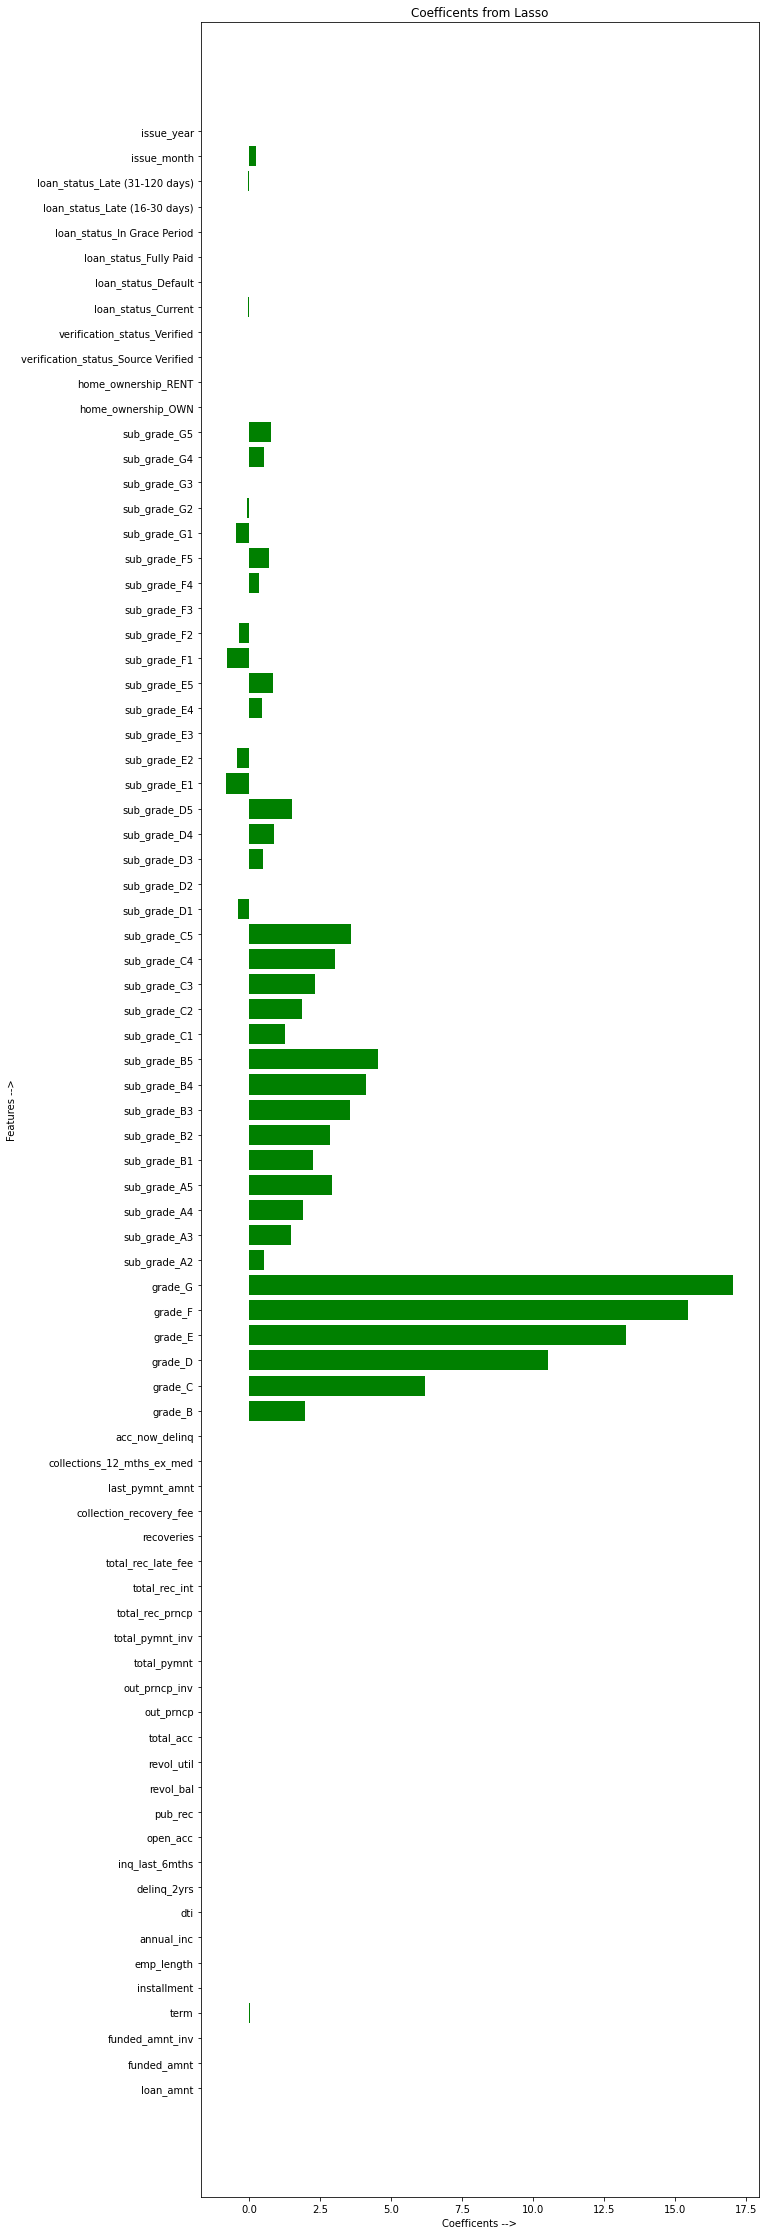

In [9]:
coeff = modellasso.coef_

x = list(Train_x)
x_pos = [i for i, _ in enumerate(x)]


plt.figure(figsize = (10,40))
plt.barh(x_pos, coeff, color='green')
plt.ylabel("Features -->")
plt.xlabel("Coefficents -->")
plt.title("Coefficents from Lasso")
plt.yticks(x_pos, x)

plt.show()